In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Spam Detection Project/Spam_Detection_Dataset_214843.csv', encoding='latin-1')

In [4]:
df.head(25)

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached is the weekly deal report from 10 / 1...
7,Ham,this is the version that we created earlier th...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze m...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [6]:
df.shape

(193852, 2)

In [7]:
df.isnull().sum()

,0
label,0
text,2


In [8]:
null_entries = df[df.isnull().any(axis=1)]

In [9]:
null_entries

,label,text
47294,Spam,NaN
149214,Ham,NaN


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

,0
label,0
text,0


In [12]:
df.shape

(193850, 2)

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_text(text):
    # Check if the input is a string before applying regex
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        text = ' '.join([word for word in tokens if word not in stop_words])
        text = re.sub(' +', ' ', text)
        return text
    # If not a string, return it as is (or handle it differently as needed)
    return text

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.head(10)

,label,text
0,Spam,viiiiiiagraaaa ones want make scream prodigy s...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom ne eds escapenumber ch n b e th n f ...
3,Spam,start increasing odds success live sexually he...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached weekly deal report 10 18 01 10 24 01 ...
7,Ham,version created earlier afternoon using enas s...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze me...


In [15]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

       label                                               text
380      Ham  david marla going track issues know trying bes...
499      Ham  steve dave spoke martha directly advised meeti...
625      Ham  original message williams robert c sent friday...
1349     Ham  escapenumberth best escapenumber escapenumber ...
1502    Spam  cescapenumber cc bescapenumber cc cescapenumbe...
...      ...                                                ...
193844   Ham  original message ntops insync net mailto ntops...
193845   Ham  compiling list everyones personal email addres...
193846   Ham  sorry tim discovered bug conversion truequote ...
193850  Spam  thank loan request recieved escapenumber escap...
193851   Ham  automatically generated delivery status notifi...

[52379 rows x 2 columns]
Number of duplicate rows: 52379


In [16]:
df.drop_duplicates(keep='first', inplace=True)

In [17]:
df.shape

(141471, 2)

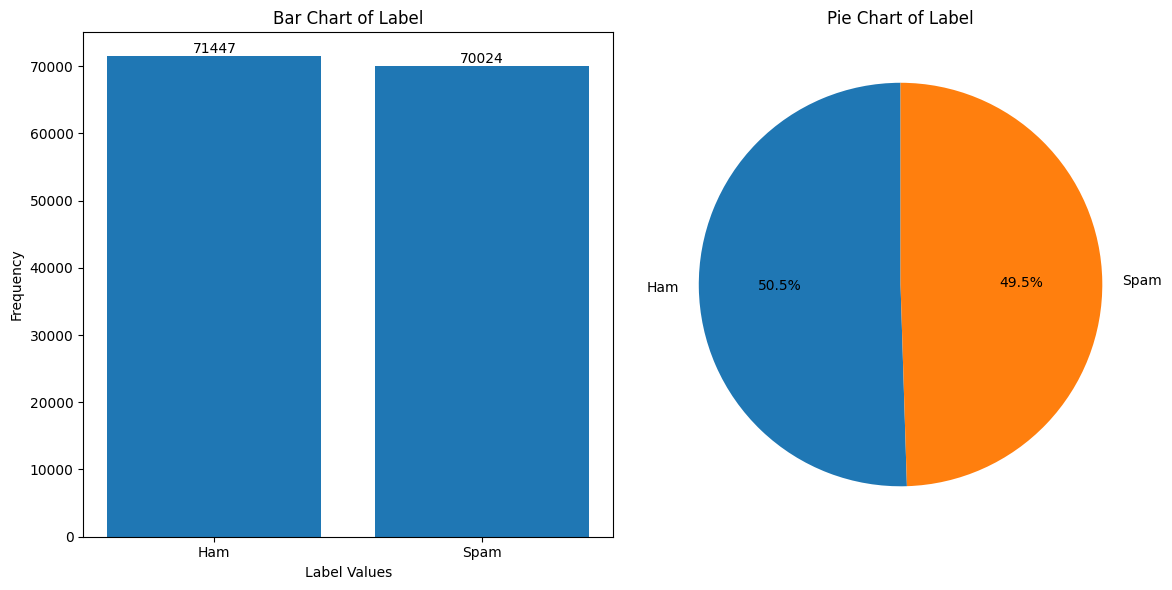

In [18]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'label' is the column for the chart
label_counts = df['label'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
ax1.bar(label_counts.index, label_counts.values)
ax1.set_title('Bar Chart of Label')
ax1.set_xlabel('Label Values')
ax1.set_ylabel('Frequency')

# Add value labels to the bars
for i, v in enumerate(label_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom')

# Pie chart
ax2.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Pie Chart of Label')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with 'label_encoded' (target) and 'text' columns

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_encoded'], test_size=0.2, random_state=78)  # Adjust test_size and random_state as needed

# 2. Create TF-IDF vectors
vectorizer = TfidfVectorizer()  # You can customize parameters here
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
# Multinomial Naive Bayes
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, y_train)
mnb_predictions = mnb_model.predict(X_test_tfidf)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
print(f"MultinomialNB Accuracy: {mnb_accuracy}")

# Bernoulli Naive Bayes
bnb_model = BernoulliNB()
bnb_model.fit(X_train_tfidf, y_train)
bnb_predictions = bnb_model.predict(X_test_tfidf)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)
print(f"BernoulliNB Accuracy: {bnb_accuracy}")

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Adjust max_iter if needed
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=78)  # Adjust parameters as needed
xgb_model.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_model.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")

# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=78)  # Adjust parameters as needed
adaboost_model.fit(X_train_tfidf, y_train)
adaboost_predictions = adaboost_model.predict(X_test_tfidf)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy}")

MultinomialNB Accuracy: 0.9632090475349001
BernoulliNB Accuracy: 0.8935147552571125
Logistic Regression Accuracy: 0.9783353949461036
XGBoost Accuracy: 0.9681569181834246
AdaBoost Accuracy: 0.844424810037109


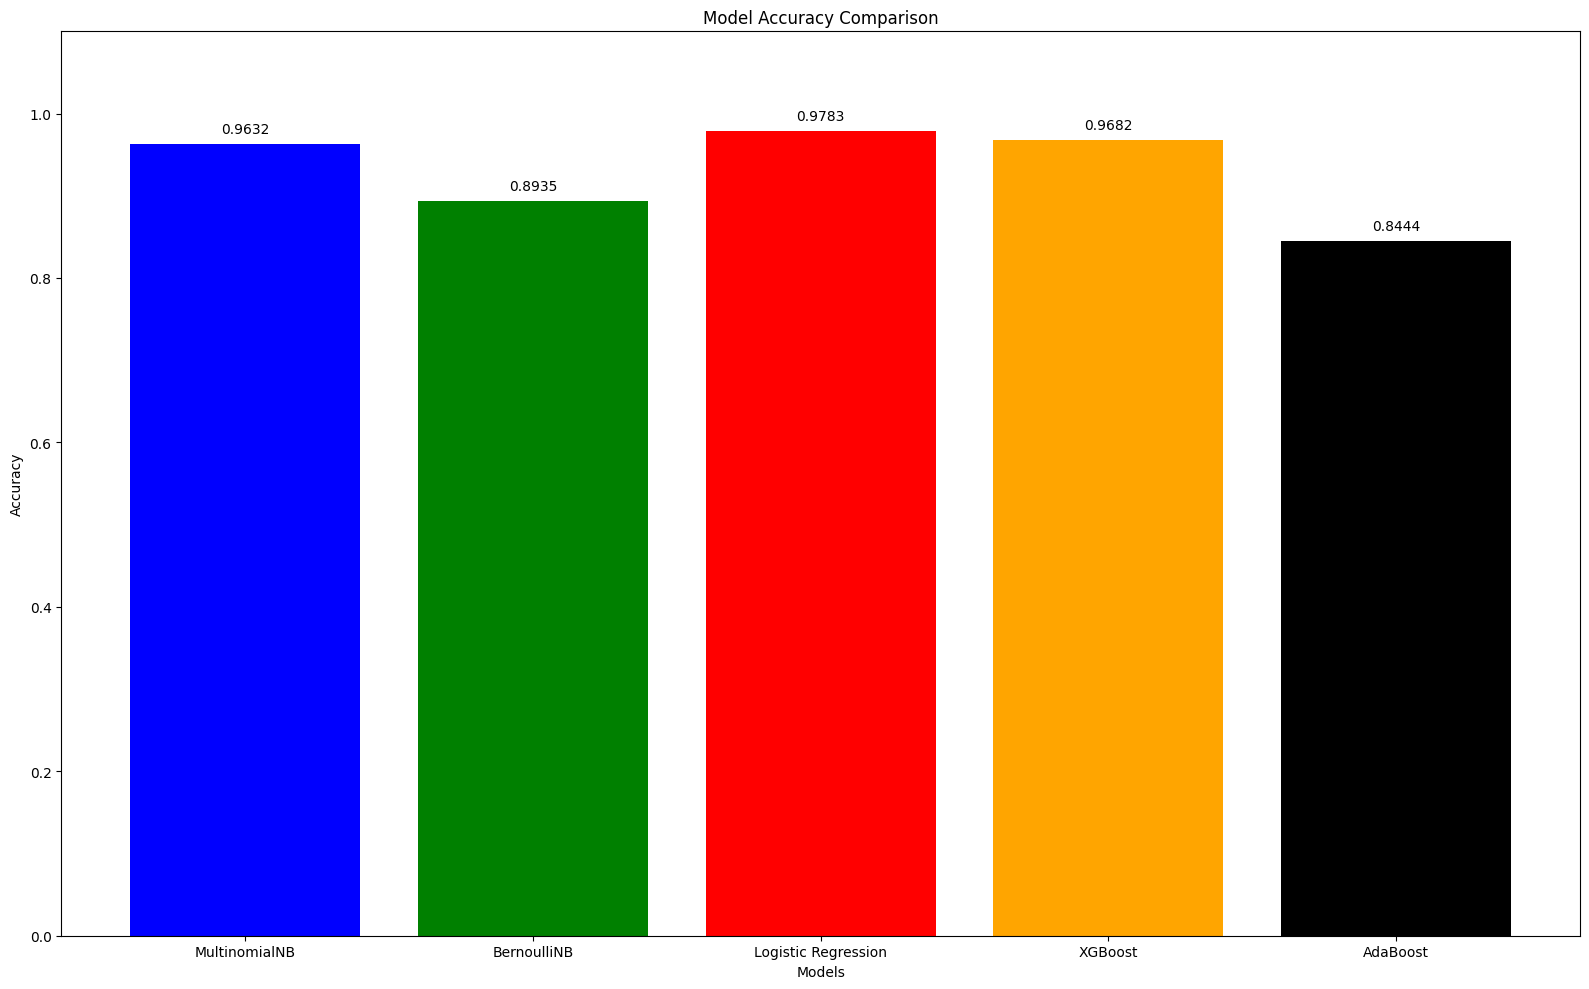

In [23]:
import matplotlib.pyplot as plt

model_names = ['MultinomialNB', 'BernoulliNB', 'Logistic Regression', 'XGBoost', 'AdaBoost']
model_accuracies = [mnb_accuracy, bnb_accuracy, lr_accuracy, xgb_accuracy, adaboost_accuracy]
plt.figure(figsize=(16, 10))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'orange', 'black'])  # Adjusted colors
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
for i, v in enumerate(model_accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

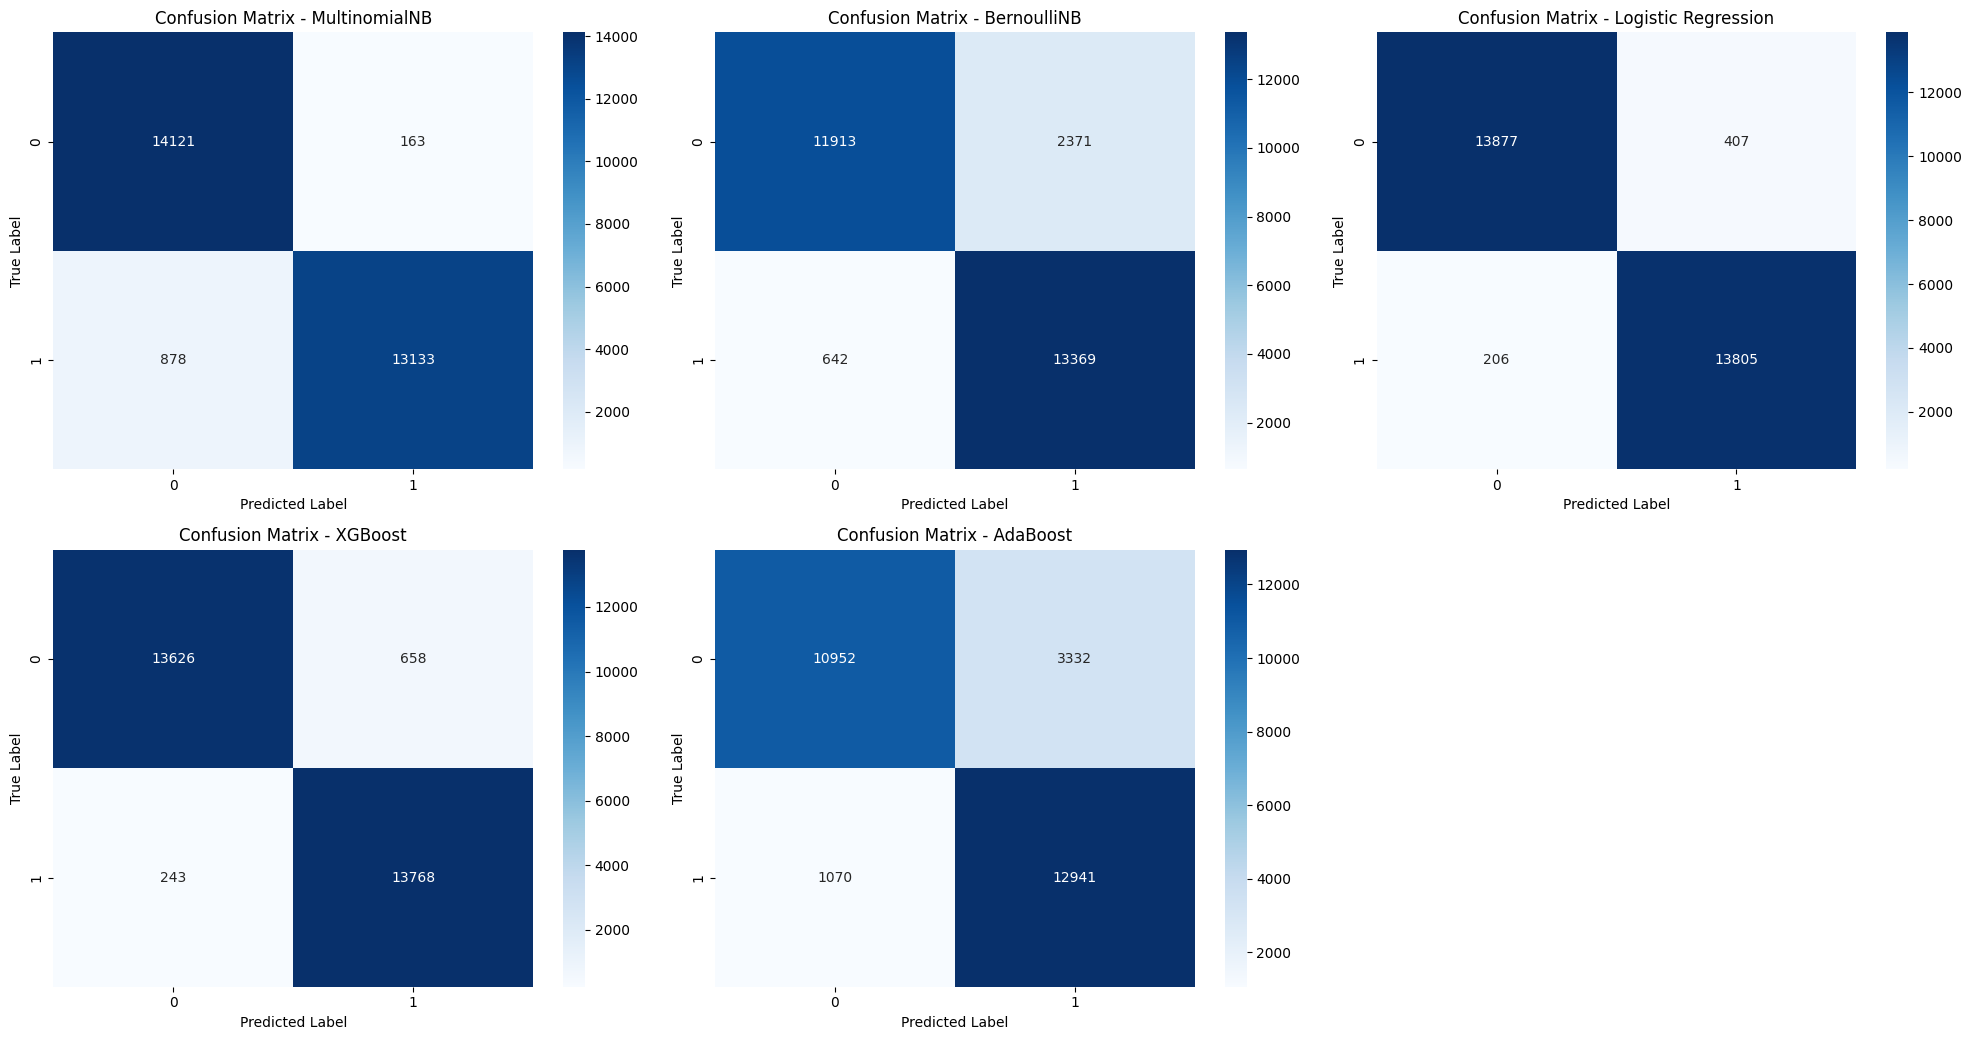

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model_names = ['MultinomialNB', 'BernoulliNB', 'Logistic Regression', 'XGBoost', 'AdaBoost']
models = [mnb_model, bnb_model, lr_model, xgb_model, adaboost_model]
predictions = [mnb_predictions, bnb_predictions, lr_predictions, xgb_predictions, adaboost_predictions]
fig, axes = plt.subplots(2, 3, figsize=(20, 10.5))
axes = axes.flatten()
for i, (model_name, model, prediction) in enumerate(zip(model_names, models, predictions)):
    if i < 5:
        cm = confusion_matrix(y_test, prediction)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {model_name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()